In [1]:
from google.colab import files
uploaded = files.upload()

Saving kerala.csv to kerala.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('/content/kerala.csv')

In [3]:
data.isnull().sum() 

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [4]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [5]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [6]:
x=data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [7]:
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

**How Rainfall is varying in Rainy Season**

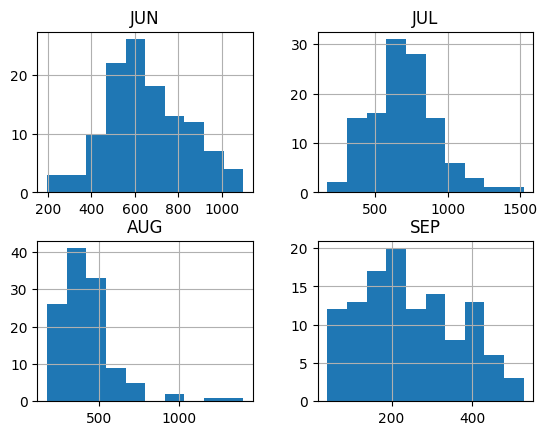

In [9]:
import matplotlib.pyplot as plt   
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

**Scaling data between 0&1**

In [16]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [18]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split                             #splitting dataset into test and training sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
y_train.dtypes

dtype('int64')

In [20]:
y_train=y_train.astype('int')
y_train

3     1
9     0
37    0
67    1
33    0
     ..
6     1
51    0
73    0
93    1
23    1
Name: FLOODS, Length: 94, dtype: int64

In [21]:
y_train=y_train.astype('int')
y_train

3     1
9     0
37    0
67    1
33    0
     ..
6     1
51    0
73    0
93    1
23    1
Name: FLOODS, Length: 94, dtype: int64

In [22]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
print("Predicted Values for the Floods:")
y_predict=clf.predict(x_test)
y_predict

Predicted Values for the Floods:


array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0])

In [25]:
print("List of Actual Values:")
print(y_test)
print("List of the Predicted Values:")
print(y_predict)

List of Actual Values:
70     1
60     1
1      1
54     1
47     1
16     0
97     1
109    1
68     0
71     0
52     0
8      1
91     1
2      1
117    1
57     1
46     1
50     0
78     0
77     1
65     0
84     0
56     1
20     0
Name: FLOODS, dtype: int64
List of the Predicted Values:
[1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0]


In [27]:
# Scaling the dataset.
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std= minmax.fit_transform(x_train)
x_test_std= minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [29]:
knn_acc

array([0.78125   , 0.80645161, 0.74193548])

In [28]:
knn_proba

array([[0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6,

In [30]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:91.666667
Recall Score:86.666667
ROC score:93.333333
[[ 9  0]
 [ 2 13]]


In [31]:
from sklearn.metrics import f1_score
knn_f1 = cross_val_score(clf, x_train_std, y_train, cv=3, scoring='f1_weighted', n_jobs=-1)
# Print the F1 score
print('F1 score:', knn_f1.mean())

F1 score: 0.7719548228518033


In [35]:
x_train_std=minmax.fit_transform(x_train)         # fit the values in between 0 and 1.
y_train_std=minmax.transform(x_test)
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')


In [36]:
lr_acc
lr_proba

array([[0.26320284, 0.73679716],
       [0.32905991, 0.67094009],
       [0.61712975, 0.38287025],
       [0.39351765, 0.60648235],
       [0.53289984, 0.46710016],
       [0.30552359, 0.69447641],
       [0.55250019, 0.44749981],
       [0.48307   , 0.51693   ],
       [0.40015819, 0.59984181],
       [0.25132963, 0.74867037],
       [0.29222454, 0.70777546],
       [0.26190275, 0.73809725],
       [0.51503066, 0.48496934],
       [0.27469057, 0.72530943],
       [0.6641557 , 0.3358443 ],
       [0.61722443, 0.38277557],
       [0.38214374, 0.61785626],
       [0.52208519, 0.47791481],
       [0.47236378, 0.52763622],
       [0.41004464, 0.58995536],
       [0.36709922, 0.63290078],
       [0.52263291, 0.47736709],
       [0.84194911, 0.15805089],
       [0.20844942, 0.79155058],
       [0.50846789, 0.49153211],
       [0.54729923, 0.45270077],
       [0.70158698, 0.29841302],
       [0.2131667 , 0.7868333 ],
       [0.58775749, 0.41224251],
       [0.39240108, 0.60759892],
       [0.

In [37]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0])

In [38]:
print(y_test.values)

[1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0]


In [39]:
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0]


In [40]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:100.000000
recall score:100.000000
roc score:100.000000
[[ 9  0]
 [ 0 15]]


In [42]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [43]:
svc_acc
svc_proba

array([[2.50727624e-02, 9.74927238e-01],
       [4.50349492e-02, 9.54965051e-01],
       [8.66282000e-01, 1.33718000e-01],
       [1.68301282e-01, 8.31698718e-01],
       [2.80192230e-01, 7.19807770e-01],
       [2.11695814e-02, 9.78830419e-01],
       [7.37683721e-01, 2.62316279e-01],
       [4.37913712e-01, 5.62086288e-01],
       [1.01680788e-01, 8.98319212e-01],
       [2.54134662e-02, 9.74586534e-01],
       [3.49430053e-02, 9.65056995e-01],
       [5.72342919e-02, 9.42765708e-01],
       [5.80807455e-01, 4.19192545e-01],
       [9.13125447e-03, 9.90868746e-01],
       [8.79576951e-01, 1.20423049e-01],
       [9.33265946e-01, 6.67340545e-02],
       [2.20905968e-01, 7.79094032e-01],
       [5.08919212e-01, 4.91080788e-01],
       [3.03009326e-01, 6.96990674e-01],
       [1.75489215e-01, 8.24510785e-01],
       [2.04513398e-01, 7.95486602e-01],
       [8.94603164e-01, 1.05396836e-01],
       [9.94196159e-01, 5.80384085e-03],
       [8.47096751e-03, 9.91529032e-01],
       [7.869469

In [44]:
svc_scores=svc_proba[:,1]
svc_scores

array([0.97492724, 0.95496505, 0.133718  , 0.83169872, 0.71980777,
       0.97883042, 0.26231628, 0.56208629, 0.89831921, 0.97458653,
       0.96505699, 0.94276571, 0.41919255, 0.99086875, 0.12042305,
       0.06673405, 0.77909403, 0.49108079, 0.69699067, 0.82451079,
       0.7954866 , 0.10539684, 0.00580384, 0.99152903, 0.21305309,
       0.19202686, 0.0529005 , 0.99191463, 0.16179436, 0.77537522,
       0.76098197, 0.39356179, 0.26153184, 0.8645011 , 0.47108964,
       0.77113429, 0.946888  , 0.07376479, 0.83089046, 0.35454197,
       0.09192467, 0.17173837, 0.0836779 , 0.45212768, 0.09312553,
       0.01240796, 0.02925494, 0.12667978, 0.02303335, 0.80152496,
       0.0602172 , 0.00443398, 0.40263207, 0.03175774, 0.29662245,
       0.56047785, 0.87283576, 0.74399378, 0.37984555, 0.16333927,
       0.93457052, 0.31862642, 0.91692116, 0.16559779, 0.94642151,
       0.74997744, 0.04449584, 0.0381262 , 0.40010054, 0.99998849,
       0.9923888 , 0.32041122, 0.67095089, 0.02460715, 0.78712

In [45]:
y_pred=svc_classifier.predict(x_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0]


In [46]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0]


In [47]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:95.833333
recall score:93.333333
roc score:96.666667
[[ 9  0]
 [ 1 14]]


In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.59375   , 0.74193548, 0.67741935])

In [49]:
print("Predicted Values:")
y_pred=dtc_clf.predict(x_test)
y_pred

Predicted Values:


array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0])

In [50]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0]


In [51]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:70.833333
recall score:66.666667
roc score:72.222222
[[ 7  2]
 [ 5 10]]


In [52]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [54]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [55]:
rmf_clf_acc
rmf_proba

array([[0.38018225, 0.61981775],
       [0.46601376, 0.53398624],
       [0.52994533, 0.47005467],
       [0.39726245, 0.60273755],
       [0.4748093 , 0.5251907 ],
       [0.30714165, 0.69285835],
       [0.51609577, 0.48390423],
       [0.53271438, 0.46728562],
       [0.42738373, 0.57261627],
       [0.30728312, 0.69271688],
       [0.42702608, 0.57297392],
       [0.22954911, 0.77045089],
       [0.43842841, 0.56157159],
       [0.3022078 , 0.6977922 ],
       [0.59655324, 0.40344676],
       [0.65852256, 0.34147744],
       [0.50685208, 0.49314792],
       [0.45274189, 0.54725811],
       [0.6024616 , 0.3975384 ],
       [0.48139294, 0.51860706],
       [0.4304215 , 0.5695785 ],
       [0.46855772, 0.53144228],
       [0.75635841, 0.24364159],
       [0.23100125, 0.76899875],
       [0.47776027, 0.52223973],
       [0.55647805, 0.44352195],
       [0.77856372, 0.22143628],
       [0.16078712, 0.83921288],
       [0.65897302, 0.34102698],
       [0.30255721, 0.69744279],
       [0.

In [56]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:70.833333
recall score:66.666667
roc score:72.222222
[[ 7  2]
 [ 5 10]]


In [58]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

,Name,Score
0,KNN,0.916667
1,LR,1.000000
2,SVC,0.958333
3,DT,0.750000
4,RF,0.833333


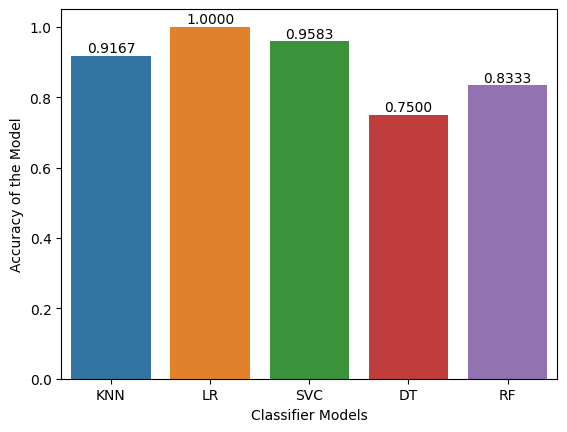

In [59]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [60]:
tr_split['Score'].max() 

1.0